In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
db = pd.read_csv("C:/Users/Admin.DESKTOP-Q9CVR13/Desktop/DataSet imarticus/PYTHON/Day 9 KNN(K-Nearest Neighbor/diabetes.csv")
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
non_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for coloumn in non_zero:
    db[coloumn] = db[coloumn].replace(0,np.NaN)
    mean = int(db[coloumn].mean(skipna = True))
    db[coloumn] = db[coloumn].replace(np.NaN,mean)
    print(db[coloumn])

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64
0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64
0      35.0
1      29.0
2      29.0
3      23.0
4      35.0
       ... 
763    48.0
764    27.0
765    23.0
766    29.0
767    31.0
Name: SkinThickness, Length: 768, dtype: float64
0      155.0
1      155.0
2      155.0
3       94.0
4      168.0
       ...  
763    180.0
764    155.0
765    112.0
766    155.0
767    155.0
Name: Insulin, Length: 768, dtype: float64
0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64


In [7]:
x = db.drop(['Outcome'],axis=1)
y = db['Outcome']

In [8]:
from sklearn import preprocessing

x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knneigh = KNeighborsClassifier(n_neighbors=5) #you can pass any numbers

In [11]:
knneigh.fit(x_train,y_train)

KNeighborsClassifier()

In [12]:
knneigh.score(x_test,y_test)

0.7662337662337663

In [16]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))
 print(error_rate)

[0.2857142857142857]
[0.2857142857142857, 0.2813852813852814]
[0.2857142857142857, 0.2813852813852814, 0.22510822510822512]
[0.2857142857142857, 0.2813852813852814, 0.22510822510822512, 0.23809523809523808]
[0.2857142857142857, 0.2813852813852814, 0.22510822510822512, 0.23809523809523808, 0.23376623376623376]
[0.2857142857142857, 0.2813852813852814, 0.22510822510822512, 0.23809523809523808, 0.23376623376623376, 0.23376623376623376]
[0.2857142857142857, 0.2813852813852814, 0.22510822510822512, 0.23809523809523808, 0.23376623376623376, 0.23376623376623376, 0.22943722943722944]
[0.2857142857142857, 0.2813852813852814, 0.22510822510822512, 0.23809523809523808, 0.23376623376623376, 0.23376623376623376, 0.22943722943722944, 0.22943722943722944]
[0.2857142857142857, 0.2813852813852814, 0.22510822510822512, 0.23809523809523808, 0.23376623376623376, 0.23376623376623376, 0.22943722943722944, 0.22943722943722944, 0.22510822510822512]
[0.2857142857142857, 0.2813852813852814, 0.22510822510822512, 0

Minimum error:- 0.19480519480519481 at K = 34


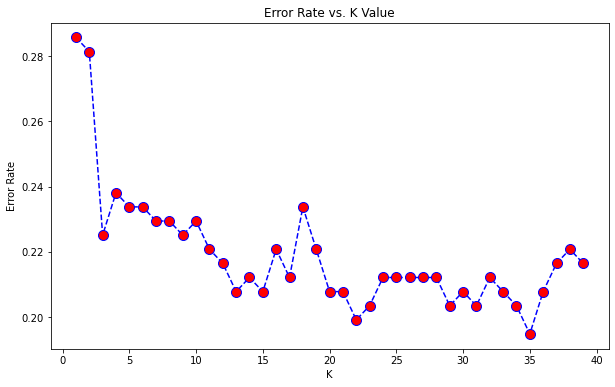

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [19]:
#From the plot, you can see that the smallest error we got is 0.59 at K=37.
#Further on, we visualize the plot between accuracy and K value.

acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

Maximum accuracy:- 0.8051948051948052 at K = 34


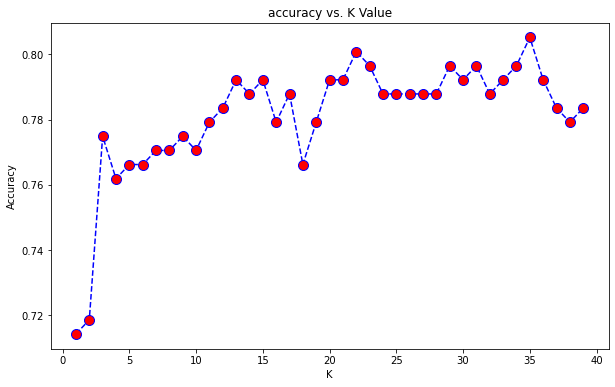

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))